# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Rizki
- Email: mrizki135790@gmail.com
- Id Dicoding: rizki_muhammad

## Background

**Jaya Jaya Institut** merupakan institusi pendidikan tinggi yang telah berdiri sejak tahun 2000. Selama lebih dari dua dekade, institut ini telah menghasilkan banyak lulusan dengan reputasi yang sangat baik.

Namun demikian, terdapat tantangan serius yang dihadapi oleh institusi ini, yaitu tingginya jumlah siswa yang tidak menyelesaikan pendidikan alias *dropout*. Fenomena ini menjadi perhatian utama karena dapat berdampak buruk terhadap citra dan kualitas institusi.

Untuk itu, Jaya Jaya Institut berinisiatif melakukan upaya preventif dengan mendeteksi lebih awal siswa-siswa yang berpotensi *dropout* agar dapat diberikan bimbingan khusus.

Sebagai calon data scientist, Anda diminta untuk membantu menganalisis data yang telah disediakan melalui tautan berikut:

🔗 [Students' Performance Dataset](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/README.md)

Selain itu, Anda juga diminta untuk membangun sebuah **dashboard interaktif** agar pihak manajemen dapat lebih mudah memahami data dan memonitor performa siswa secara berkala.


## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# =====================================
# 1. PERSIAPAN - Menyiapkan Library
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

# Untuk visualisasi yang lebih baik
plt.style.use('default')
sns.set_palette("husl")

print("✅ Library berhasil diimport!")

✅ Library berhasil diimport!


### Menyiapkan data yang akan diguankan

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df = pd.read_csv(url, delimiter=';')
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [3]:
# =====================================
# 2. DATA UNDERSTANDING
# =====================================

print("📊 INFORMASI DATASET")
print("="*50)
print(f"Ukuran dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

print("\n📋 INFO DATASET:")
print(df.info())

print("\n📈 STATISTIK DESKRIPTIF:")
print(df.describe())

print("\n🎯 TARGET VARIABLE (Status):")
print(df['Status'].value_counts())

print("\n📊 PROPORSI TARGET:")
status_prop = df['Status'].value_counts(normalize=True) * 100
print(f"Graduate: {status_prop['Graduate']:.2f}%")
print(f"Dropout: {status_prop['Dropout']:.2f}%")
if 'Enrolled' in status_prop:
    print(f"Enrolled: {status_prop['Enrolled']:.2f}%")

# Cek missing values
print("\n❓ MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✅ Tidak ada missing values!")

# Tampilkan sample data
print("\n📝 SAMPLE DATA (5 baris pertama):")
print(df.head())

📊 INFORMASI DATASET
Ukuran dataset: (4424, 37)
Jumlah baris: 4424
Jumlah kolom: 37

📋 INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                 

**Analisis hasil Data Understanding**

Dataset ini terdiri dari 4424 entri dan 37 fitur, tanpa adanya nilai yang hilang. Semua fitur bertipe numerik kecuali `Status` sebagai target yang bersifat kategorikal (Graduate, Dropout, Enrolled). Komposisi target cukup seimbang dengan mayoritas mahasiswa berstatus Graduate (49.93%), diikuti Dropout (32.12%) dan Enrolled (17.95%). Dataset mencakup berbagai aspek mahasiswa seperti latar belakang pendidikan, status sosial ekonomi, hingga performa akademik semester 1 dan 2. Secara umum, dataset ini siap untuk eksplorasi lebih lanjut dan pemodelan prediktif tanpa perlu praproses data dasar seperti imputasi nilai hilang.


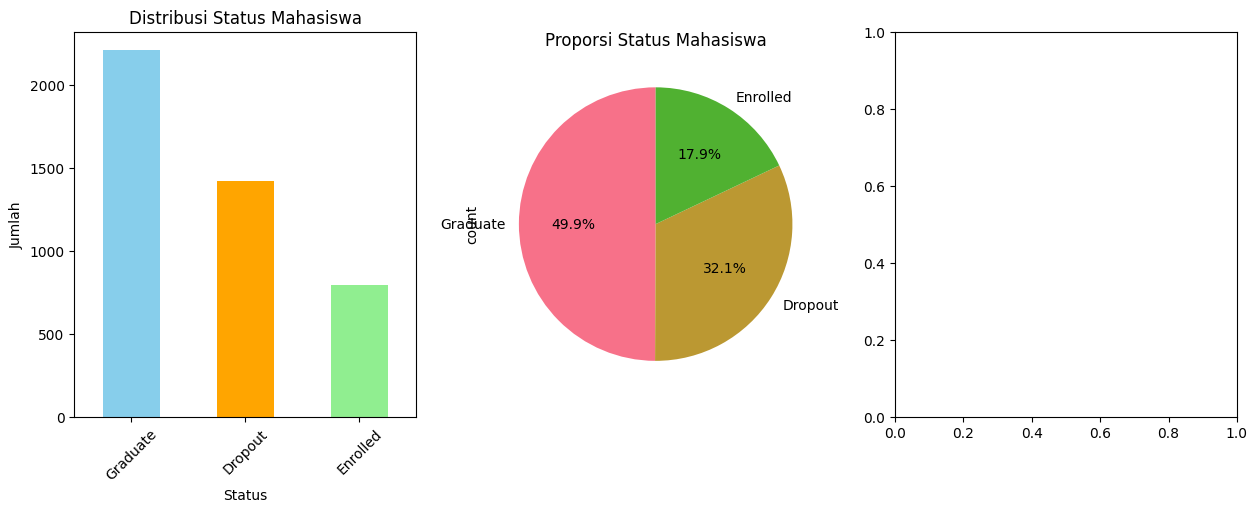

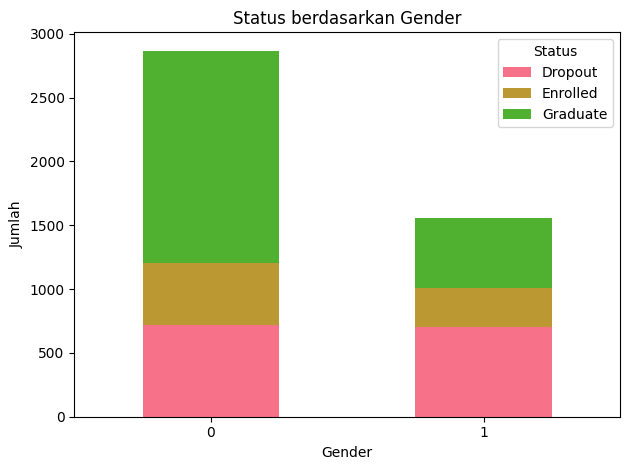


🔢 KOLOM NUMERIK: 36 kolom
['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']


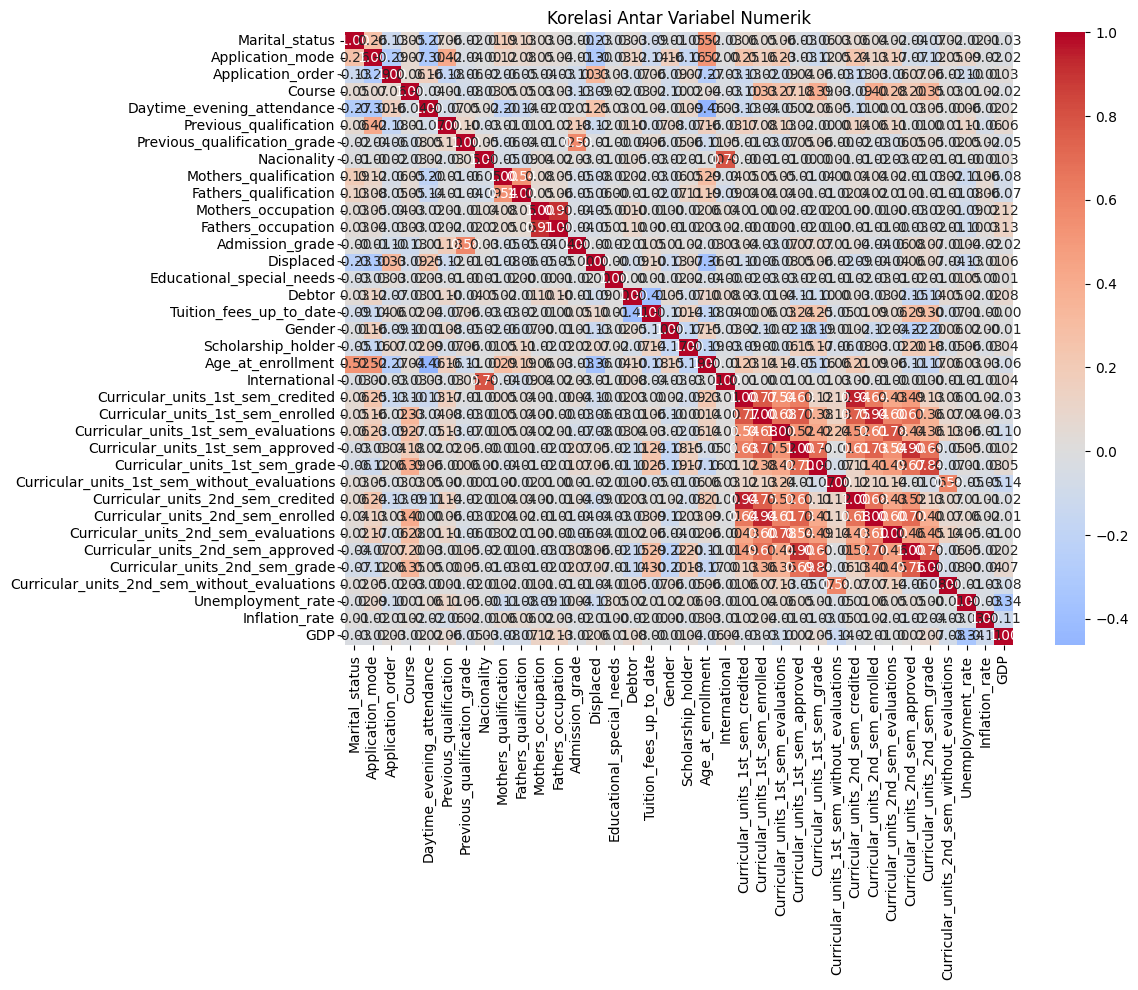

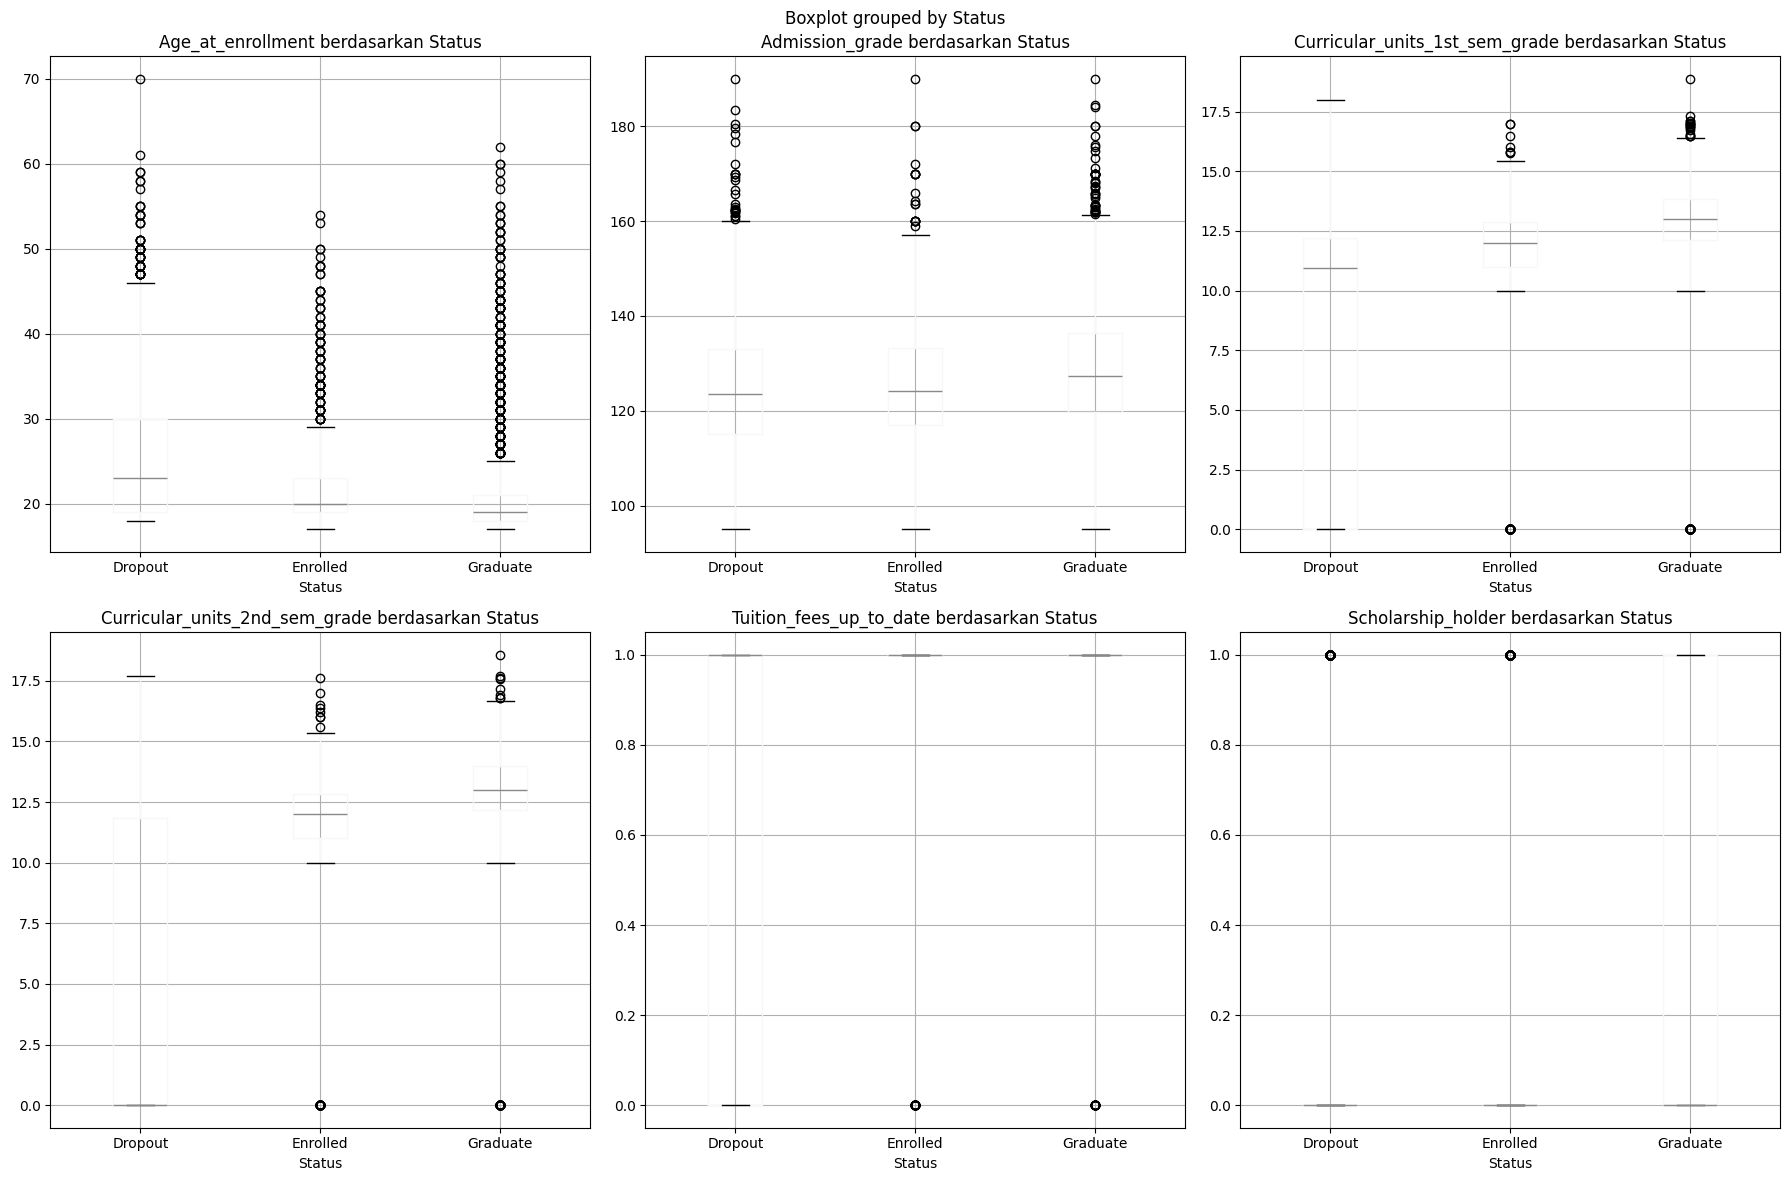

In [4]:
# =====================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# =====================================

# Visualisasi distribusi target variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['Status'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Distribusi Status Mahasiswa')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Status Mahasiswa')

# Analisis berdasarkan gender
plt.subplot(1, 3, 3)
pd.crosstab(df['Gender'], df['Status']).plot(kind='bar', stacked=True)
plt.title('Status berdasarkan Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Analisis korelasi untuk variabel numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"\n🔢 KOLOM NUMERIK: {len(numeric_cols)} kolom")
print(list(numeric_cols))

# Heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.tight_layout()
plt.show()

# Analisis faktor-faktor penting
important_factors = ['Age_at_enrollment', 'Admission_grade', 'Curricular_units_1st_sem_grade',
                    'Curricular_units_2nd_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(important_factors):
    if col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df.boxplot(column=col, by='Status', ax=axes[i])
            axes[i].set_title(f'{col} berdasarkan Status')
        else:
            pd.crosstab(df[col], df['Status']).plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'{col} berdasarkan Status')

plt.tight_layout()
plt.show()


## Data Preparation / Preprocessing

In [5]:
# =====================================
# 4. DATA PREPARATION / PREPROCESSING
# =====================================

print("\n🔧 DATA PREPROCESSING")
print("="*50)

# Buat copy dataset untuk preprocessing
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = df_processed.select_dtypes(include=['object']).columns

print(f"📋 Kolom kategorikal yang akan di-encode: {len(categorical_cols)} kolom")

for col in categorical_cols:
    if col != 'Status':  # Jangan encode target variable dulu
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
df_processed['Status'] = target_encoder.fit_transform(df_processed['Status'])

print(f"✅ Target encoding: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

# Pisahkan features dan target
X = df_processed.drop('Status', axis=1)
y = df_processed['Status']

print(f"\n📊 Ukuran data setelah preprocessing:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n✂️ Data splitting:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling selesai!")


🔧 DATA PREPROCESSING
📋 Kolom kategorikal yang akan di-encode: 1 kolom
✅ Target encoding: {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

📊 Ukuran data setelah preprocessing:
Features (X): (4424, 36)
Target (y): (4424,)

✂️ Data splitting:
Training set: 3539 samples
Test set: 885 samples
✅ Feature scaling selesai!


**Analisis Hasil Data preprocessing**

Setelah melakukan preprocessing data, terdapat 1 kolom kategorikal yang di-encode menggunakan target encoding dengan label 'Dropout' sebagai 0, 'Enrolled' sebagai 1, dan 'Graduate' sebagai 2. Data yang telah diproses terdiri dari 4424 baris dengan 36 fitur. Data tersebut kemudian dibagi menjadi set pelatihan sebanyak 3539 sampel dan set pengujian sebanyak 885 sampel. Seluruh fitur juga sudah berhasil diskalakan untuk memastikan konsistensi dalam model pembelajaran.

## Modeling

In [6]:
# =====================================
# 5. MODELING
# =====================================

print("\n🤖 MACHINE LEARNING MODELING")
print("="*50)

# Inisialisasi models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Training dan evaluasi models
model_results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Training
    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)

    # Cross validation
    if name == 'SVM':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"✅ {name} - Accuracy: {accuracy:.4f}, CV: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



🤖 MACHINE LEARNING MODELING

🔄 Training Logistic Regression...
✅ Logistic Regression - Accuracy: 0.6859, CV: 0.6779 (±0.0144)

🔄 Training Random Forest...
✅ Random Forest - Accuracy: 0.7672, CV: 0.7782 (±0.0124)

🔄 Training Gradient Boosting...
✅ Gradient Boosting - Accuracy: 0.7593, CV: 0.7748 (±0.0073)

🔄 Training Decision Tree...
✅ Decision Tree - Accuracy: 0.6972, CV: 0.6784 (±0.0171)

🔄 Training SVM...
✅ SVM - Accuracy: 0.7582, CV: 0.7567 (±0.0090)


Random Forest memberikan hasil terbaik dengan akurasi 76,7% dan validasi silang 77,8%, diikuti Gradient Boosting dan SVM sekitar 75-76%. Logistic Regression dan Decision Tree memiliki akurasi lebih rendah sekitar 68-70%.

## Evaluation


📊 MODEL EVALUATION
                 Model  Accuracy  CV Mean  CV Std
0  Logistic Regression    0.6859   0.6779  0.0144
1        Random Forest    0.7672   0.7782  0.0124
2    Gradient Boosting    0.7593   0.7748  0.0073
3        Decision Tree    0.6972   0.6784  0.0171
4                  SVM    0.7582   0.7567  0.0090

🏆 BEST MODEL: Random Forest
Accuracy: 0.7672

📋 CLASSIFICATION REPORT - Random Forest:
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.57      0.37      0.45       159
    Graduate       0.78      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.77      0.75       885



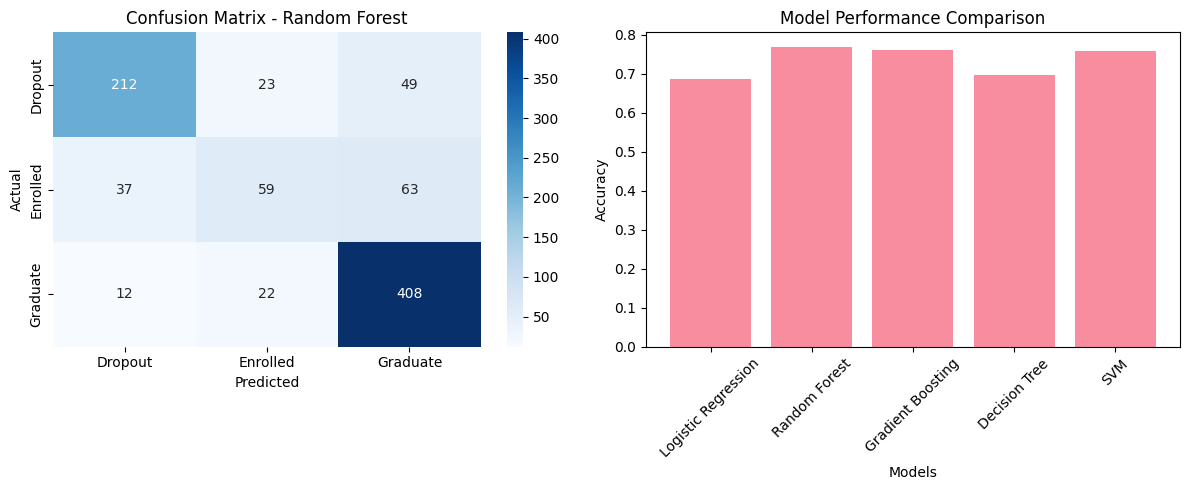


🎯 TOP 10 FEATURE IMPORTANCE - Random Forest:
                                 feature  importance
30     Curricular_units_2nd_sem_approved    0.142283
31        Curricular_units_2nd_sem_grade    0.109008
24     Curricular_units_1st_sem_approved    0.091937
25        Curricular_units_1st_sem_grade    0.059588
12                       Admission_grade    0.043575
19                     Age_at_enrollment    0.040287
16               Tuition_fees_up_to_date    0.038903
29  Curricular_units_2nd_sem_evaluations    0.038200
23  Curricular_units_1st_sem_evaluations    0.037504
6           Previous_qualification_grade    0.037498


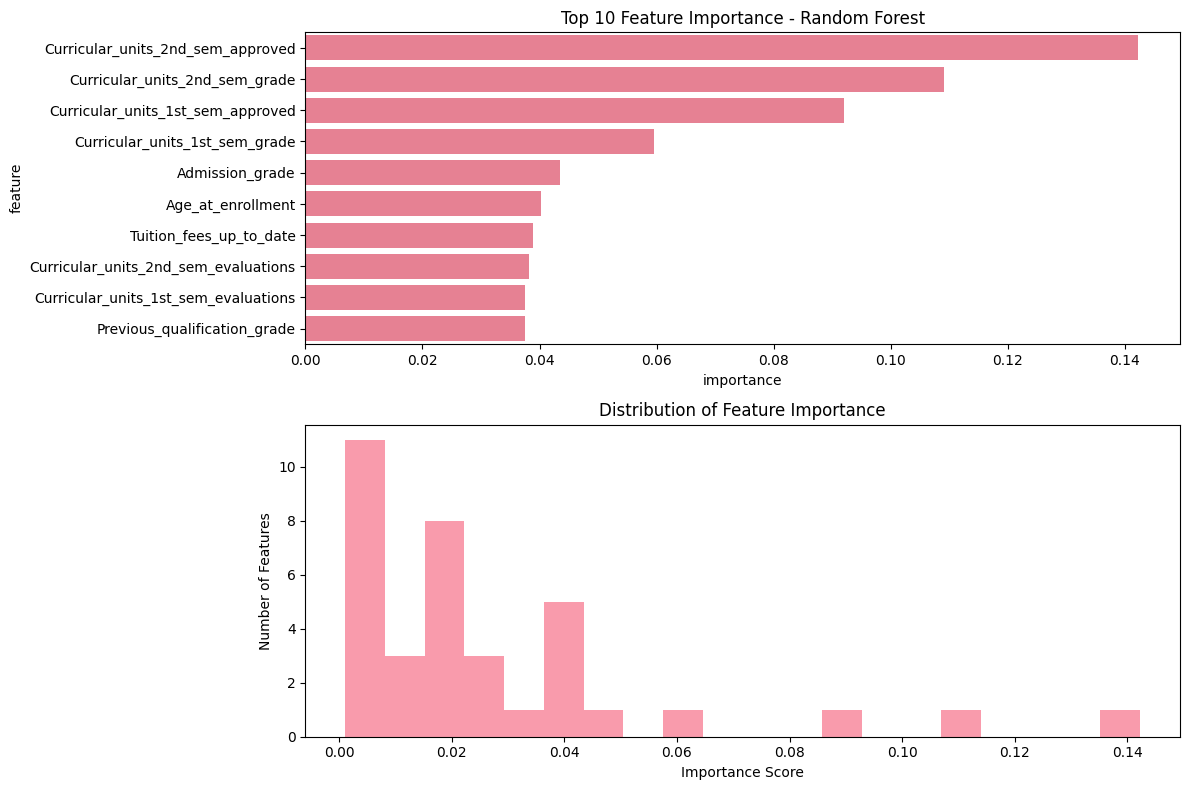

In [7]:
# =====================================
# 6. EVALUATION
# =====================================

print("\n📊 MODEL EVALUATION")
print("="*50)

# Comparison table
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [results['accuracy'] for results in model_results.values()],
    'CV Mean': [results['cv_mean'] for results in model_results.values()],
    'CV Std': [results['cv_std'] for results in model_results.values()]
})

print(results_df.round(4))

# Find best model (berdasarkan Accuracy)
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"Accuracy: {model_results[best_model_name]['accuracy']:.4f}")

# Detailed evaluation for best model
print(f"\n📋 CLASSIFICATION REPORT - {best_model_name}:")
print(classification_report(
    y_test,
    model_results[best_model_name]['y_pred'],
    target_names=target_encoder.classes_
))

# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, model_results[best_model_name]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Model Comparison (Accuracy)
plt.subplot(1, 2, 2)
model_names = list(model_results.keys())
accuracies = [model_results[name]['accuracy'] for name in model_names]

plt.bar(model_names, accuracies, alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Feature Importance (untuk tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\n🎯 TOP 10 FEATURE IMPORTANCE - {best_model_name}:")
    print(feature_importance.head(10))

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')

    # Feature importance distribution
    plt.subplot(2, 1, 2)
    plt.hist(feature_importance['importance'], bins=20, alpha=0.7)
    plt.xlabel('Importance Score')
    plt.ylabel('Number of Features')
    plt.title('Distribution of Feature Importance')

    plt.tight_layout()
    plt.show()


Model Random Forest terbaik dengan akurasi 76,7% menunjukkan performa baik, terutama pada kelas Dropout dan Graduate dengan f1-score masing-masing 0,78 dan 0,85, meskipun kelas Enrolled memiliki recall rendah (0,37). Fitur paling penting adalah jumlah mata kuliah yang disetujui dan nilai pada semester pertama dan kedua, serta nilai penerimaan dan usia saat masuk.

In [8]:
# =====================================
# 7. BUSINESS INSIGHTS & RECOMMENDATIONS
# =====================================

print("\n💼 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*60)

print("🎯 KEY FINDINGS:")
print("1. Model terbaik:", best_model_name)
print(f"2. Akurasi prediksi: {model_results[best_model_name]['accuracy']:.1%}")

# Analisis distribusi prediksi
dropout_prob = model_results[best_model_name]['y_pred_proba']
high_risk_threshold = 0.7
high_risk_students = np.sum(dropout_prob > high_risk_threshold)

print(f"\n📊 RISK ANALYSIS:")
print(f"• Mahasiswa berisiko tinggi dropout (>70%): {high_risk_students} dari {len(dropout_prob)} ({high_risk_students/len(dropout_prob)*100:.1f}%)")
print(f"• Mahasiswa berisiko sedang (30-70%): {np.sum((dropout_prob >= 0.3) & (dropout_prob <= 0.7))}")
print(f"• Mahasiswa berisiko rendah (<30%): {np.sum(dropout_prob < 0.3)}")

print(f"\n💡 REKOMENDASI BISNIS:")
print("1. 🎯 EARLY WARNING SYSTEM:")
print("   - Implementasikan sistem monitoring otomatis")
print("   - Identifikasi mahasiswa berisiko tinggi setiap semester")
print("   - Berikan intervensi dini untuk mahasiswa dengan probabilitas dropout >70%")

print("\n2. 📚 PROGRAM INTERVENSI:")
print("   - Bimbingan akademik intensif untuk mahasiswa berisiko tinggi")
print("   - Program mentoring dan konseling")
print("   - Fleksibilitas pembayaran untuk masalah finansial")

print("\n3. 📈 MONITORING & EVALUATION:")
print("   - Update model secara berkala dengan data terbaru")
print("   - Track efektivitas program intervensi")
print("   - Analisis faktor-faktor baru yang mempengaruhi dropout")

print(f"\n4. 🎯 FOKUS AREA UTAMA:")
if hasattr(best_model, 'feature_importances_'):
    top_3_features = feature_importance.head(3)['feature'].tolist()
    print(f"   - Perhatikan khusus pada: {', '.join(top_3_features)}")

print("\n✅ PROYEK SELESAI!")
print("Dataset berhasil dianalisis dan model prediksi dropout telah dibuat.")
print("Model dapat digunakan untuk identifikasi dini mahasiswa berisiko dropout.")

# Save hasil untuk deployment
print(f"\n💾 Untuk deployment")
print("- Model terbaik: best_model")
print("- Scaler: scaler")
print("- Label encoders: label_encoders")
print("- Target encoder: target_encoder")


💼 BUSINESS INSIGHTS & RECOMMENDATIONS
🎯 KEY FINDINGS:
1. Model terbaik: Random Forest
2. Akurasi prediksi: 76.7%

📊 RISK ANALYSIS:
• Mahasiswa berisiko tinggi dropout (>70%): 1 dari 885 (0.1%)
• Mahasiswa berisiko sedang (30-70%): 235
• Mahasiswa berisiko rendah (<30%): 649

💡 REKOMENDASI BISNIS:
1. 🎯 EARLY WARNING SYSTEM:
   - Implementasikan sistem monitoring otomatis
   - Identifikasi mahasiswa berisiko tinggi setiap semester
   - Berikan intervensi dini untuk mahasiswa dengan probabilitas dropout >70%

2. 📚 PROGRAM INTERVENSI:
   - Bimbingan akademik intensif untuk mahasiswa berisiko tinggi
   - Program mentoring dan konseling
   - Fleksibilitas pembayaran untuk masalah finansial

3. 📈 MONITORING & EVALUATION:
   - Update model secara berkala dengan data terbaru
   - Track efektivitas program intervensi
   - Analisis faktor-faktor baru yang mempengaruhi dropout

4. 🎯 FOKUS AREA UTAMA:
   - Perhatikan khusus pada: Curricular_units_2nd_sem_approved, Curricular_units_2nd_sem_grade, C

## Migrasi ke supabase (Uncomment jika dibutuhkan)

In [9]:
# import pandas as pd
# from sqlalchemy import create_engine

# # Langkah 1: Unduh CSV dari GitHub
# csv_url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
# df = pd.read_csv(url, delimiter=';')

# # Lihat 5 baris pertama
# df.head()


In [19]:

# from getpass import getpass
# from sqlalchemy import create_engine

# # Minta password Supabase
# password = "isi"

# # Gunakan Transaction Pooler (IPv4 Compatible)
# database_url = f"..."

# # Buat engine
# engine = create_engine(database_url)

# # Upload dataframe ke tabel 'student'
# df.to_sql("student", engine, if_exists="replace", index=False)

# print("✅ Upload selesai! Tabel 'student' berhasil dibuat di database.")


✅ Upload selesai! Tabel 'student' berhasil dibuat di database.
